Combining and Propagating Errors
=========

Error in *f*(*x*) due to error in *x*
----------------------------------------

Suppose we measure $x$, but the physical quantity of interest is some function $f(x)$.  How do we extract the error on $f$, $\Delta f$, from the error on $x$, $\Delta x$?  

The simplest thing to do is to calculate $f(x-\Delta x)$ and $f(x+\Delta x)$.  **This is perfectly legitimate**, and will almost always work (the only case in which it will return misleading results is when the function $f$ turns round inside the range $x\pm\Delta x$ &ndash; for example, the upper limit of $\sin(89^\circ \pm 3^\circ)$ is 1, not $\sin(92^\circ)$).  This method is particularly useful when the dependence on $x$ is complicated, when $\Delta x$ is not small, or when the error is asymmetric (in the above example, $\sin(89^\circ\pm 3^\circ)= 0.99985_{-0.00228}^{+0.00015}$).

However, in the case in which $\Delta x$ is small, we have
$$
\frac{\Delta f}{\Delta x}\simeq \left|\frac{\mathrm{d}f}{\mathrm{d}x}\right|
$$
(the modulus sign is because both $\Delta f$ and $\Delta x$ are normally defined to be positive).  This is the formula that leads to such standard results as

$$
\begin{aligned}
\Delta(x^2) &= 2x\Delta x\\
\Delta(\ln x) &= \Delta x/x \\
\Delta(\sin x) &= \cos x\ \Delta x
\end{aligned}
$$
(where in the last case $\Delta x$ must be in radians).



Functions of more than one variable
--------------------------------------

Often the physics quantity of interest is calculated from more than one measured quantity.  In this case the fundamental rule from statistics is

> **The variance of the sum is the sum of the variances** 

(variance is $\sigma^2$, so this is saying that $\left(\Delta(x+y)\right)^2 = (\Delta x)^2 + (\Delta y)^2$).

To apply this to more complicated functions, say $f(x\pm\Delta x,y\pm\Delta y)$, we first calculate the uncertainty on $f$ due to $\Delta x$, $\Delta_x f$ either by calculating $f(x+\Delta x,y)$ or by
$$
\frac{\Delta_x f}{\Delta x} \simeq \left|\frac{\partial f}{\partial x}\right|,
$$
then do the same thing for $\Delta_y f$, and finally sum the variances:
$$
(\Delta f)^2 = (\Delta_x f)^2 + (\Delta_y f)^2.
$$
Note that when calculating $\Delta_x f$, we leave $y$ at its central value, and similarly for $\Delta_y f$.  This assumes that $x$ and $y$ are **uncorrelated** &ndash; that is, whether our measured value of $x$ is larger or smaller than the 
true value does not affect our measured value of $y$ and vice versa.  This is not always true.

The code below tests this for the simple case of $x+y$.  The arrays **xdata** and **ydata** contain "measured values" drawn from Gaussians with means **xtrue** and **ytrue** and standard deviations **sigx** and **sigy** respectively.  Array **sdata** contains the sum of each $(x,y)$ pair.  We then calculate the mean and standard deviation of each of the three arrays and compare with expectation.  The particularly interesting question is whether the measured standard deviation of **sdata**, **sigsm**, agrees with the calculated value **sigs** ($=\sqrt{\sigma_x^2 + \sigma_y^2}$).

xtrue =  4.50 , ytrue =  3.50 , strue =  8.00
sigx  =  0.30 , sigy  =  0.40 , sigs  =  0.50
xmean =  4.51 , ymean =  3.49 , smean =  8.00
sigxm =  0.28 , sigym =  0.39 , sigsm =  0.48


(array([  2.,   2.,   1.,   5.,   6.,   4.,  19.,  14.,  15.,  22.,  14.,
         13.,  24.,  14.,  14.,   7.,   4.,   5.,   6.,   9.]),
 array([ 6.76579454,  6.8795206 ,  6.99324667,  7.10697273,  7.22069879,
         7.33442486,  7.44815092,  7.56187698,  7.67560304,  7.78932911,
         7.90305517,  8.01678123,  8.1305073 ,  8.24423336,  8.35795942,
         8.47168548,  8.58541155,  8.69913761,  8.81286367,  8.92658974,
         9.0403158 ]),
 <a list of 20 Patch objects>)

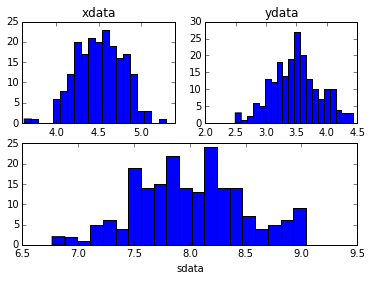

In [35]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

xtrue = 4.5
sigx = 0.3

ytrue = 3.5
sigy = 0.4

strue = xtrue+ytrue
sigs = np.sqrt(sigx*sigx + sigy*sigy)

xdata=np.random.normal(xtrue,sigx,200)
ydata=np.random.normal(ytrue,sigy,200)
sdata=np.sum([xdata,ydata],axis=0)

xmean=sum(xdata)/len(xdata)
ymean=sum(ydata)/len(ydata)
smean=sum(sdata)/len(sdata)

sumxsq=0
sumysq=0
sumssq=0

for i in range(len(xdata)):
    sumxsq=sumxsq+np.power(xdata[i]-xmean,2)
    sumysq=sumysq+np.power(ydata[i]-ymean,2)
    sumssq=sumssq+np.power(sdata[i]-smean,2)
    
sigxm = np.sqrt(sumxsq/(len(xdata)-1)) 
sigym = np.sqrt(sumysq/(len(xdata)-1))
sigsm = np.sqrt(sumssq/(len(xdata)-1))

print('xtrue = %5.2f'%xtrue,', ytrue = %5.2f'%ytrue,', strue = %5.2f'%strue)
print('sigx  = %5.2f'%sigx,', sigy  = %5.2f'%sigy,', sigs  = %5.2f'%sigs)
print('xmean = %5.2f'%xmean,', ymean = %5.2f'%ymean,', smean = %5.2f'%smean)
print('sigxm = %5.2f'%sigxm,', sigym = %5.2f'%sigym,', sigsm = %5.2f'%sigsm)

plt.figure(1)
plt.subplot(221)
plt.title('xdata')
plt.hist(xdata,20)
plt.subplot(222)
plt.title('ydata')
plt.hist(ydata,20)
plt.subplot(212)
plt.xlabel('sdata')
plt.hist(sdata,20)

Some standard formulae
------------------------

You can do any error calculation involving uncorrelated errors from the above rules.  However, it is useful to remember some standard formulae for common functions.  In all cases, it is assumed that the uncertainty in $x$ is $\sigma_x$, in $y$ $\sigma_y$, etc.

|&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Function &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; |&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Error &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|
|:--------:|:-----:|
|$f=x+y$   |$\sigma_f=\sqrt{\sigma_x^2+\sigma_y^2}$|
|$f=x-y$   |$\sigma_f=\sqrt{\sigma_x^2+\sigma_y^2}$|
|$f=xy$    |$$\frac{\sigma_f}{f}=\sqrt{\left(\frac{\sigma_x}{x}\right)^2 + \left(\frac{\sigma_y}{y}\right)^2}$$|
|$f=x/y$   |$$\frac{\sigma_f}{f}=\sqrt{\left(\frac{\sigma_x}{x}\right)^2 + \left(\frac{\sigma_y}{y}\right)^2}$$|
|$f=x^n$   |$$\frac{\sigma_f}{f}=n\frac{\sigma_x}{x}$$|
|$f=x^n\times y^m$|$$\frac{\sigma_f}{f}=\sqrt{\left(n\frac{\sigma_x}{x}\right)^2 + \left(m\frac{\sigma_y}{y}\right)^2}$$|
|$f=x^n \pm y^m$|$\sigma_f = \sqrt{(nx^{n-1}\sigma_x)^2+(my^{m-1}\sigma_y)^2}$|
|$f=\ln x$ |$\sigma_f = \sigma_x/x$|
|$f=e^x$   |$\sigma_f/f = \sigma_x$|
|$f=\sin x$|$\sigma_f = \sigma_x\cos x$|
|$f=\cos x$|$\sigma_f = \sigma_x \sin x$|

In the case of more complicated functions, you can break them down into simple stages: for example, the uncertainty in $f(x,y)=\sin\left(\sqrt{x^2+y^2}\right)$ can be calculated by first calculating $\sigma_{x^2+y^2}$, then $\sigma_{\sqrt{x^2+y^2}}$ and finally the required answer, in three steps.